In [1]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt
import os
from astropy import units
from astropy.coordinates import SkyCoord

[  6.36690021   7.09638566   3.40190624 ...,  10.20799002   6.38039368
   0.42983306]


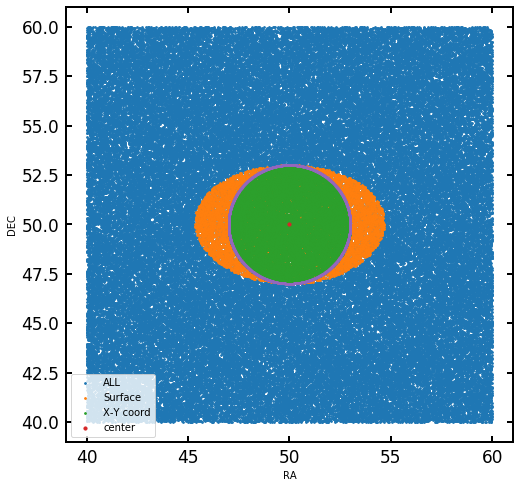

In [32]:
radius = 3
ra_s, ra_e = 40, 60
dec_s, dec_e = 40, 60
cra, cdec = (ra_s+ra_e)/2, (dec_s+dec_e)/2
ra = numpy.random.uniform(ra_s,ra_e,100000)
dec = numpy.random.uniform(dec_s,dec_e,100000)
c1 = SkyCoord(ra=cra*units.degree, dec=cdec*units.degree, frame="icrs")
c2 = SkyCoord(ra=ra*units.degree, dec=dec*units.degree, frame="icrs")
sep = c1.separation(c2).degree
print(sep)
img = Image_Plot(fig_x= 8,fig_y=8)
img.create_subfig(1,1)
img.axs[0][0].scatter(ra,dec,s=3,label="ALL")

idx = sep <= radius
ra_n = (ra[idx] - cra)*numpy.cos(dec[idx]/180*numpy.pi) + cra

img.axs[0][0].scatter(ra[idx],dec[idx],s=3,label="Surface")
img.axs[0][0].scatter(ra_n,dec[idx],s=3,label="X-Y coord")
img.axs[0][0].scatter(cra,cdec,s=10,label="center")

theta = numpy.linspace(-numpy.pi, numpy.pi, 5000)
x = cra+numpy.cos(theta)*radius
y = cdec + numpy.sin(theta)*radius
img.axs[0][0].scatter(x,y,s=1)
img.axs[0][0].set_xlabel("RA")
img.axs[0][0].set_ylabel("DEC")
img.axs[0][0].legend()

In [61]:
radius = 3
for i in range(15):
#     ra_s, ra_e = 40, 60
#     dec_s, dec_e = 5*i, 5*i+20
#     # center
#     cen_ra, cen_dec = (ra_s+ra_e)/2, (dec_s+dec_e)/2

    # ra = numpy.random.uniform(ra_s,ra_e,100000)
    # dec = numpy.random.uniform(dec_s,dec_e,100000)
    # c_all = SkyCoord(ra=ra*units.degree, dec=dec*units.degree, frame="fk5")

    cen_ra, cen_dec = i*5, i*6
    c_cen = SkyCoord(ra=cen_ra*units.degree, dec=cen_dec*units.degree, frame="fk5")

    d_ra, d_dec = 1,1
    c_check = SkyCoord(ra=(cen_ra + d_ra)*units.degree, dec=(cen_dec + d_dec)*units.degree, frame="fk5")
    sep = c_cen.separation(c_check).degree
    
    cen_cos_dec = numpy.cos(cen_dec/180*numpy.pi)
    cos_dec = numpy.cos((cen_dec + d_dec)/180*numpy.pi)
    
    print(cen_ra, cen_dec, sep -  numpy.sqrt((cen_cos_dec*cen_ra - cen_cos_dec*(cen_ra+d_ra))**2 + d_dec**2))

0 0 -3.59014209812e-05
5 6 -0.000679119519113
10 12 -0.0013044436207
15 18 -0.00189383162843
20 24 -0.00242879550283
25 30 -0.00289024202302
30 36 -0.00325840177807
35 42 -0.00351294824942
40 48 -0.00363348606363
45 54 -0.00360068540612
50 60 -0.00339841806429
55 66 -0.00301720116708
60 72 -0.00245888637493
65 78 -0.00174167272656
70 84 -0.000903341576376


In [62]:
radius = 3
for i in range(15):
#     ra_s, ra_e = 40, 60
#     dec_s, dec_e = 5*i, 5*i+20
#     # center
#     cen_ra, cen_dec = (ra_s+ra_e)/2, (dec_s+dec_e)/2

    # ra = numpy.random.uniform(ra_s,ra_e,100000)
    # dec = numpy.random.uniform(dec_s,dec_e,100000)
    # c_all = SkyCoord(ra=ra*units.degree, dec=dec*units.degree, frame="fk5")

    cen_ra, cen_dec = i*5, i*6
    c_cen = SkyCoord(ra=cen_ra*units.degree, dec=cen_dec*units.degree, frame="icrs")

    d_ra, d_dec = 3,3
    c_check = SkyCoord(ra=(cen_ra + d_ra)*units.degree, dec=(cen_dec + d_dec)*units.degree, frame="icrs")
    sep = c_cen.separation(c_check).degree
    
    cen_cos_dec = numpy.cos(cen_dec/180*numpy.pi)
    cos_dec = numpy.cos((cen_dec + d_dec)/180*numpy.pi)
    
    print(cen_ra, cen_dec, sep -  numpy.sqrt((cen_cos_dec*cen_ra - cen_cos_dec*(cen_ra+d_ra))**2 + d_dec**2))

0 0 -0.000969751837615
5 6 -0.00676011527928
10 12 -0.012387009798
15 18 -0.0176868011329
20 24 -0.0224912534253
25 30 -0.0266262506128
30 36 -0.0299113827921
35 42 -0.0321613430043
40 48 -0.0331907943419
45 54 -0.0328252577457
50 60 -0.0309212396669
55 66 -0.0273982277082
60 72 -0.0222815664501
65 78 -0.0157471402804
70 84 -0.00814819036656
